In [2]:
my.wd <- getwd()

In [4]:
library("tidyverse")
library("asdreader")
library("opusreader2")
library("prospectr")
library("qs")
library("moments")
library("resemble")

In [5]:
## Internet configuration for downloading big datasets
options(timeout = 10000)

## Reading serialized files
neospectra.soil <- qread_url("https://storage.googleapis.com/soilspec4gg-public/neospectra_soillab_v1.2.qs")
dim(neospectra.soil)

[1] 2106   24

In [6]:
head(neospectra.soil)

,id.sample_local_c,oc_usda.c729_w.pct,c.tot_usda.a622_w.pct,n.tot_usda.a623_w.pct,s.tot_usda.a624_w.pct,ph.h2o_usda.a268_index,bd_usda.a4_g.cm3,clay.tot_usda.a334_w.pct,silt.tot_usda.c62_w.pct,sand.tot_usda.c60_w.pct,⋯,mg.ext_usda.a724_cmolc.kg,k.ext_usda.a725_cmolc.kg,na.ext_usda.a726_cmolc.kg,wr.33kPa_usda.a415_w.pct,wr.1500kPa_usda.a417_w.pct,al.dith_usda.a65_w.pct,p.ext_usda.a652_mg.kg,p.ext_usda.a1070_mg.kg,k.ext_usda.a1065_mg.kg,ec_usda.a364_ds.m
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26949,3.2,NA,0.31,NA,5.36,NA,32.4,25.6,42.0,⋯,2.0,0.5,0.0,NA,14.7,0.4,NA,NA,NA,NA
2,26950,1.7,NA,0.19,NA,4.32,NA,46.5,25.2,28.3,⋯,1.0,0.2,0.0,NA,14.7,0.4,NA,NA,NA,NA
3,26951,0.6,NA,0.09,NA,4.42,NA,44.2,32.8,23.0,⋯,0.5,0.1,0.0,NA,17.0,0.5,NA,NA,NA,NA
4,26952,0.2,NA,0.06,NA,4.49,NA,40.9,36.0,23.1,⋯,0.3,0.1,0.0,NA,17.0,0.5,NA,NA,NA,NA
5,26953,0.2,NA,0.06,NA,4.43,NA,37.9,45.0,17.1,⋯,0.2,0.1,0.1,26.3,20.7,0.5,NA,NA,NA,NA
6,26954,2.1,NA,0.23,NA,6.12,NA,27.3,25.8,46.9,⋯,1.6,0.8,0.0,26.3,20.7,0.5,NA,NA,NA,NA


In [7]:
neospectra.site <- qread_url("https://storage.googleapis.com/soilspec4gg-public/neospectra_soilsite_v1.2.qs")
dim(neospectra.site)

[1] 2106   32

In [8]:
neospectra.nir <- qread_url("https://storage.googleapis.com/soilspec4gg-public/neospectra_nir_v1.2.qs")
dim(neospectra.nir)

[1] 8151  615

In [9]:
head(neospectra.nir)

id.sample_local_c,id.scan_local_c,scan.lab_utf8_txt,scan.nir.date.begin_iso.8601_yyyy.mm.dd,scan.nir.date.end_iso.8601_yyyy.mm.dd,scan.nir.model.name_utf8_txt,scan.nir.model.serialnumber_utf8_int,scan.nir.accessory.used_utf8_txt,scan.nir.method.preparation_any_txt,scan.nir.license.title_ascii_txt,⋯,scan_nir.2532_ref,scan_nir.2534_ref,scan_nir.2536_ref,scan_nir.2538_ref,scan_nir.2540_ref,scan_nir.2542_ref,scan_nir.2544_ref,scan_nir.2546_ref,scan_nir.2548_ref,scan_nir.2550_ref
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
30747,NEO1_030747,Woodwell,2021-01-01,2022-12-31,NEO1,21020033,n,<2 mm,CC-BY,⋯,0.13329,0.13270,0.13210,0.13151,0.13090,0.13030,0.12970,0.12909,0.12849,0.12789
36001,NEO1_036001,Woodwell,2021-01-01,2022-12-31,NEO1,21020033,n,<2 mm,CC-BY,⋯,0.48541,0.48429,0.48314,0.48195,0.48071,0.47943,0.47811,0.47674,0.47531,0.47383
36035,NEO1_036035,Woodwell,2021-01-01,2022-12-31,NEO1,21020033,n,<2 mm,CC-BY,⋯,0.55803,0.55738,0.55674,0.55612,0.55550,0.55490,0.55431,0.55373,0.55317,0.55262
36224,NEO1_036224,Woodwell,2021-01-01,2022-12-31,NEO1,21020033,n,<2 mm,CC-BY,⋯,0.52374,0.52307,0.52241,0.52176,0.52112,0.52049,0.51988,0.51928,0.51869,0.51813
36261,NEO1_036261,Woodwell,2021-01-01,2022-12-31,NEO1,21020033,n,<2 mm,CC-BY,⋯,0.59144,0.59060,0.58976,0.58894,0.58811,0.58730,0.58650,0.58571,0.58494,0.58419
36275,NEO1_036275,Woodwell,2021-01-01,2022-12-31,NEO1,21020033,n,<2 mm,CC-BY,⋯,0.45610,0.45517,0.45423,0.45329,0.45235,0.45140,0.45044,0.44947,0.44849,0.44750


In [10]:
neospectra.site %>%
  count(location.country_iso.3166_txt)

location.country_iso.3166_txt,n
<chr>,<int>
GHA,66
KEN,10
NGA,14
USA,2016


In [11]:
neospectra.nir[1:5,1:5]


id.sample_local_c,id.scan_local_c,scan.lab_utf8_txt,scan.nir.date.begin_iso.8601_yyyy.mm.dd,scan.nir.date.end_iso.8601_yyyy.mm.dd
<chr>,<chr>,<chr>,<chr>,<chr>
30747,NEO1_030747,Woodwell,2021-01-01,2022-12-31
36001,NEO1_036001,Woodwell,2021-01-01,2022-12-31
36035,NEO1_036035,Woodwell,2021-01-01,2022-12-31
36224,NEO1_036224,Woodwell,2021-01-01,2022-12-31
36261,NEO1_036261,Woodwell,2021-01-01,2022-12-31


In [12]:
# Selecting relevant site data
neospectra.site <- neospectra.site %>%
  select(id.sample_local_c, location.country_iso.3166_txt)

# Selecting relevant soil data
neospectra.soil <- neospectra.soil %>%
  select(id.sample_local_c, oc_usda.c729_w.pct)

# Selecting relevant NIR data and taking average across repeats
neospectra.nir <- neospectra.nir %>%
  select(id.sample_local_c, starts_with("scan_nir")) %>%
  group_by(id.sample_local_c) %>%
  summarise_all(mean, .group = "drop")

# Renaming spectral columns headers to numeric integers
neospectra.nir %>%
  select(starts_with("scan_nir")) %>%
  names() %>%
  head()

[1] "scan_nir.1350_ref" "scan_nir.1352_ref" "scan_nir.1354_ref"
[4] "scan_nir.1356_ref" "scan_nir.1358_ref" "scan_nir.1360_ref"

In [13]:
old.names <- neospectra.nir %>%
  select(starts_with("scan_nir")) %>%
  names()

new.names <- gsub("scan_nir.|_ref", "", old.names)

neospectra.nir <- neospectra.nir %>%
  rename_with(~new.names, all_of(old.names))

spectral.column.names <- new.names

neospectra.nir[1:5,1:5]

id.sample_local_c,1350,1352,1354,1356
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100540,0.3500380,0.3505740,0.3511400,0.3517540
101337,0.3745017,0.3749833,0.3755217,0.3760267
101343,0.2496900,0.2501333,0.2505567,0.2509033
101372,0.4634783,0.4639117,0.4642917,0.4645767
102078,0.3436580,0.3443340,0.3450080,0.3456700


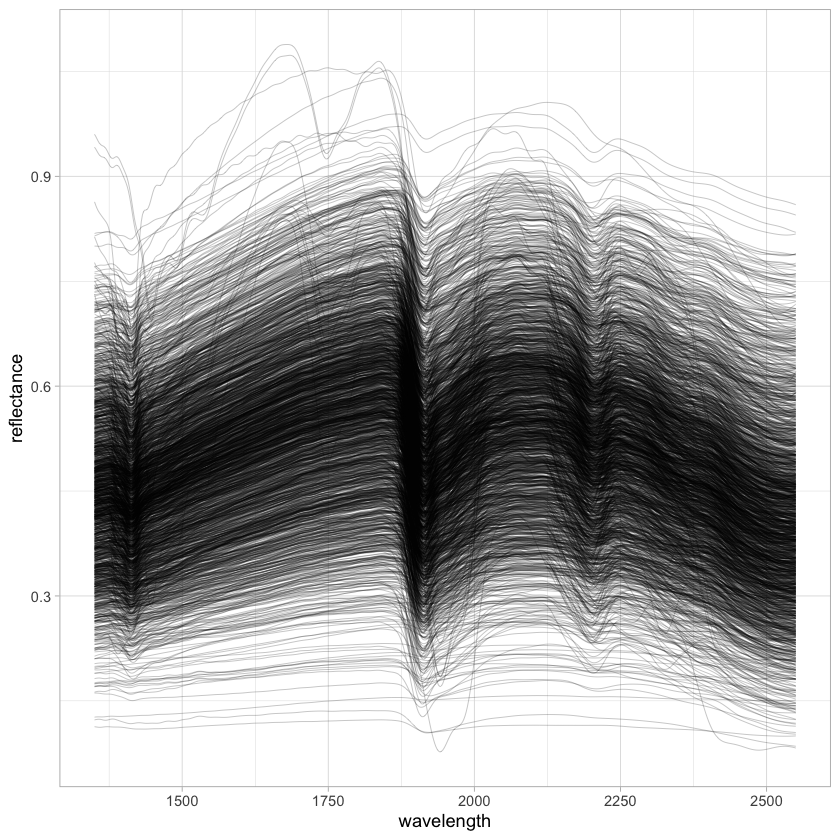

In [14]:
neospectra.nir %>%
  pivot_longer(any_of(spectral.column.names),
               names_to = "wavelength",
               values_to = "reflectance") %>%
  mutate(wavelength = as.numeric(wavelength),
         reflectance = as.numeric(reflectance)) %>%
  ggplot(data = .) +
  geom_line(aes(x = wavelength, y = reflectance, group = id.sample_local_c),
            alpha = 0.25, linewidth = 0.25) +
  theme_light()

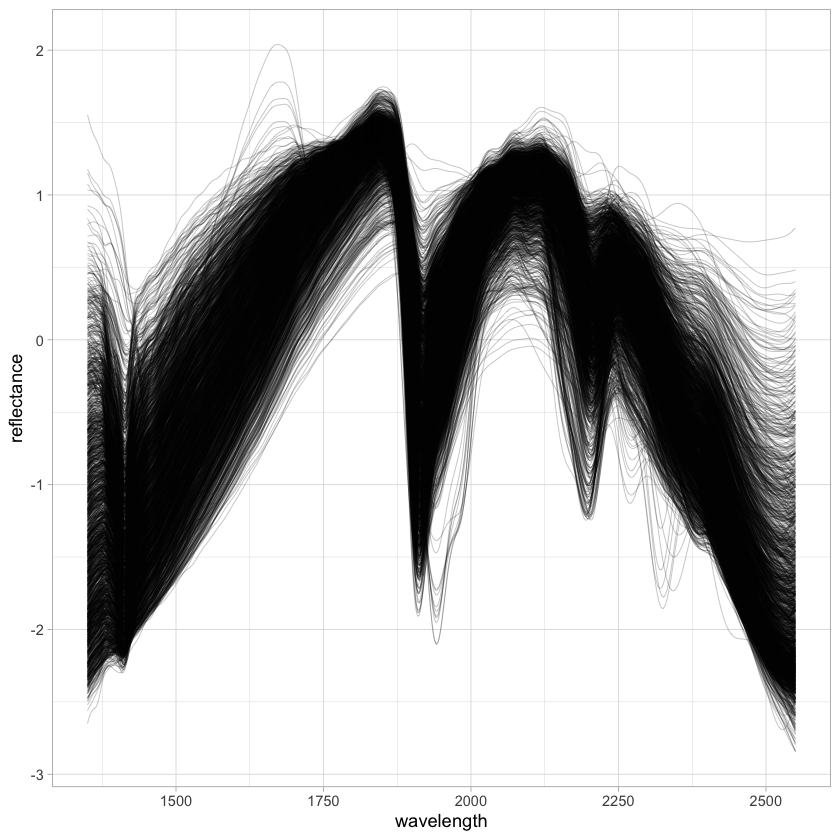

In [15]:
neospectra.nir.snv <- neospectra.nir %>%
  select(all_of(spectral.column.names)) %>%
  as.matrix() %>%
  prospectr::standardNormalVariate(X = .) %>%
  as_tibble() %>%
  bind_cols({neospectra.nir %>%
      select(id.sample_local_c)}, .)

neospectra.nir.snv %>%
  pivot_longer(any_of(spectral.column.names),
               names_to = "wavelength",
               values_to = "reflectance") %>%
  mutate(wavelength = as.numeric(wavelength),
         reflectance = as.numeric(reflectance)) %>%
  ggplot(data = .) +
  geom_line(aes(x = wavelength, y = reflectance, group = id.sample_local_c),
            alpha = 0.25, linewidth = 0.25) +
  theme_light()

In [16]:
# Joining data
neospectra <- left_join(neospectra.site,
                        neospectra.soil,
                        by = "id.sample_local_c") %>%
  left_join(., neospectra.nir.snv, by = "id.sample_local_c")

# Filtering out samples without SOC values
neospectra <- neospectra %>%
  filter(!is.na(oc_usda.c729_w.pct))

neospectra[1:5,1:5]

id.sample_local_c,location.country_iso.3166_txt,oc_usda.c729_w.pct,1350,1352
<chr>,<chr>,<dbl>,<dbl>,<dbl>
100540,USA,3.1900,-1.5237432,-1.5121720
101337,USA,8.4300,-0.8349967,-0.8206217
101343,USA,0.6900,-1.9306119,-1.9091058
101372,USA,1.8100,-1.0991180,-1.0878570
102078,USA,1.7524,-1.7704206,-1.7544688


In [17]:
# Preparing train and test split
neospectra.train <- neospectra %>%
  filter(location.country_iso.3166_txt == "USA")

neospectra.test <- neospectra %>%
  filter(location.country_iso.3166_txt != "USA")

In [18]:
train.pca <- neospectra.train %>%
  select(all_of(spectral.column.names)) %>%
  as.matrix() %>%
  resemble::ortho_projection(Xr = .,
                             Xu = NULL,
                             Yr = NULL,
                             method = "pca",
                             pc_selection = list(method = "cumvar",
                                                 value = 0.99),
                             center = TRUE, scale = TRUE)

names(train.pca)

[1] "scores"       "X_loadings"   "variance"     "scores_sd"    "n_components"
[6] "pc_selection" "center"       "scale"        "method"

Warning message in par(opar):
“argument 1 does not name a graphical parameter”


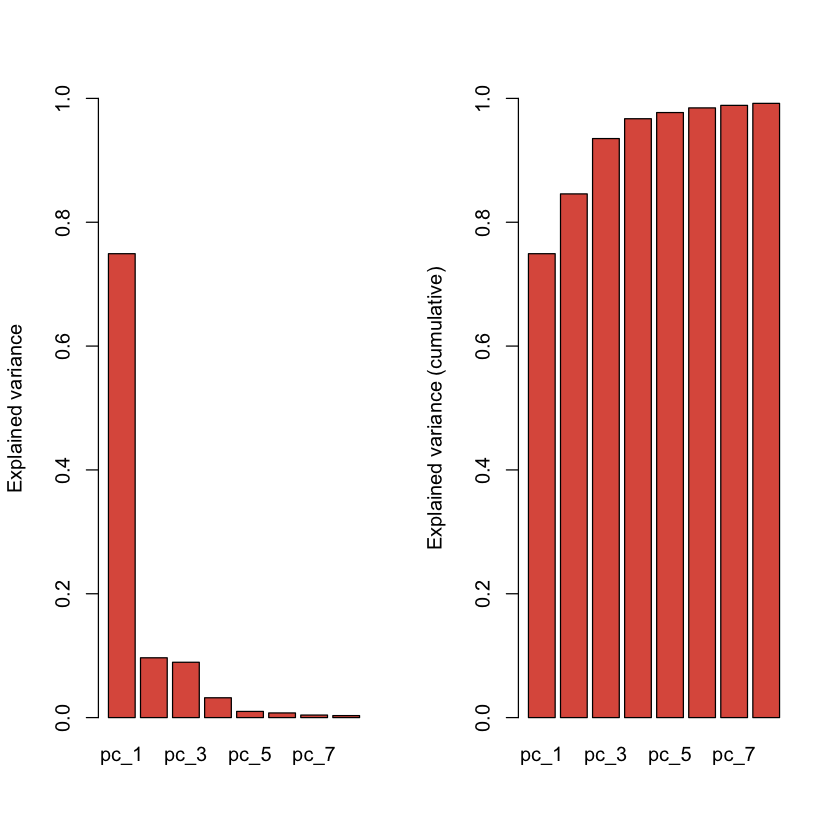

In [19]:
# How many components where retained?
plot(train.pca, col = "#D42B08CC")

In [20]:
# We can get the scores and exp. variance back and make a plot
train.pca.scores <- train.pca$scores %>%
  as_tibble() %>%
  bind_cols({neospectra.train %>%
      select(id.sample_local_c,
             location.country_iso.3166_txt,
             oc_usda.c729_w.pct)}, .)

train.pca$variance

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8
var,9.072794e+05,1.169588e+05,1.082318e+05,3.876384e+04,1.209569e+04,9.105178e+03,4.948019e+03,3.926273e+03
explained_var,7.491893e-01,9.657916e-02,8.937281e-02,3.200938e-02,9.988064e-03,7.518634e-03,4.085845e-03,3.242134e-03
cumulative_explained_var,7.491893e-01,8.457684e-01,9.351412e-01,9.671506e-01,9.771387e-01,9.846573e-01,9.887432e-01,9.919853e-01


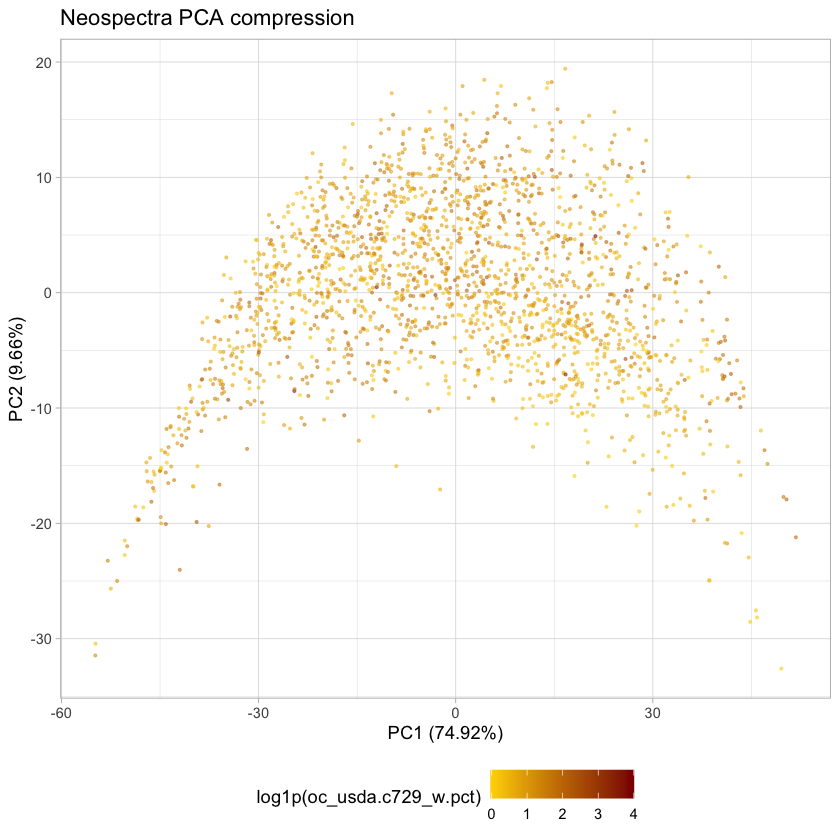

In [21]:
train.pca.expvar <- round(train.pca$variance$x_var["explained_var",]*100, 2)

p.pca <- ggplot(train.pca.scores) +
  geom_point(aes(x = pc_1, y = pc_2, color = log1p(oc_usda.c729_w.pct)),
             alpha = 0.5, size = 0.5) +
  scale_colour_gradient(low = "gold",
                        high = "darkred",) +
  labs(title = "Neospectra PCA compression",
       x = paste0("PC1 (", train.pca.expvar[1], "%)"),
       y = paste0("PC2 (", train.pca.expvar[2], "%)")) +
  theme_light() +
  theme(legend.position = "bottom"); p.pca

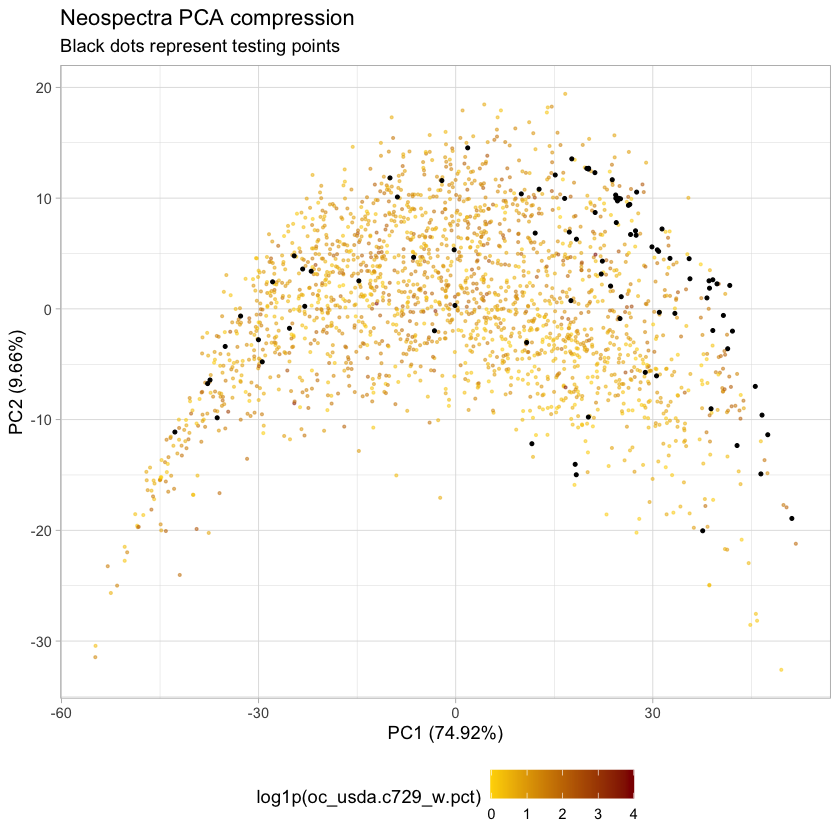

In [22]:
# Predicting the test samples and plotting
test.pca.scores <- neospectra.test %>%
  select(all_of(spectral.column.names)) %>%
  as.matrix() %>%
  predict(train.pca, newdata = .)
  
test.pca.scores <- neospectra.test %>%
    select(id.sample_local_c,
           location.country_iso.3166_txt,
           oc_usda.c729_w.pct) %>%
  bind_cols(test.pca.scores)

# Adding test samples to PCA plot
p.pca.test <- p.pca +
  geom_point(data = test.pca.scores,
             aes(x = pc_1, y = pc_2),
             size = 0.75) +
  labs(subtitle = "Black dots represent testing points"); p.pca.test

In [23]:
# Saving the PCA plot
ggsave(file.path(my.wd, "plot_pca_train_test.png"), p.pca.test,
       dpi = 300, width = 4, height = 3, units = "in", scale = 1.5)

# Saving the train set
write_csv(train.pca.scores, file.path(my.wd, "train.csv"))

# Saving the test set
write_csv(test.pca.scores, file.path(my.wd, "test.csv"))